In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
sleep = pd.read_csv('/Users/herrakaava/Documents/school/intro_comp_stats/data/sleep.csv', index_col=0)

In [3]:
sleep

,extra,group,ID
1,0.7,1,1
2,-1.6,1,2
3,-0.2,1,3
4,-1.2,1,4
5,-0.1,1,5
6,3.4,1,6
7,3.7,1,7
8,0.8,1,8
9,0.0,1,9
10,2.0,1,10


- Tarkastellaan aineistoa, jossa on kirjattuna kahden eri lääkkeen vaikutus yöunen määrän lisääntymiseen. 
- Tarkastellaan permutaatiotestillä nollahypoteesiä, että ryhmien keskiarvoissa ei ole eroa, ja lasketaan p-arvot kun vaihtoehtoinen hypoteesi on, että 1-ryhmässä keskiarvo on pienempi tai että ryhmien keskiarvot ylipäänsä poikkeavat toisistaan.

<h3>One-sided test</h3>

$$
\begin{aligned}
\text{H}_0 &: \mu_1 = \mu_2 \quad \text{(Ei eroa keskiarvoissa)} \\
\text{H}_1 &: \mu_1 < \mu_2 \quad \text{(Ryhmässä 1 keskiarvo on pienempi)}
\end{aligned}
$$

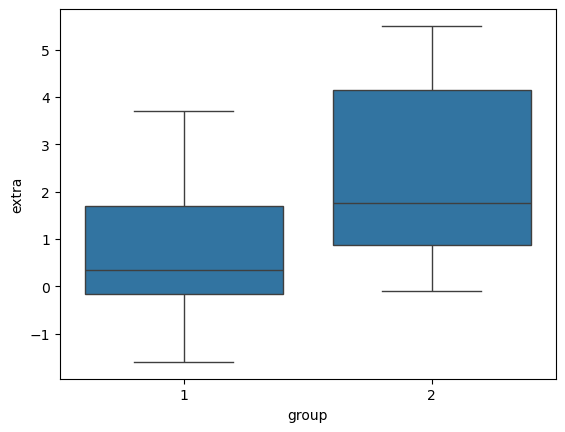

In [4]:
sns.boxplot(x='group', y='extra', data=sleep);

In [5]:
x1 = sleep[sleep['group'] == 1]['extra']
x2 = sleep[sleep['group'] == 2]['extra']

\begin{equation*}
    \large t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\end{equation*}

In [6]:
def t_statistic(x1, x2):
    x1_mean = np.mean(x1)
    x1_var = np.var(x1)
    n1 = x1.shape[0]
    x2_mean = np.mean(x2)
    x2_var = np.var(x2)
    n2 = x2.shape[0]
    return (x1_mean - x2_mean) / np.sqrt((x1_var / n1) + (x2_var / n2))

In [7]:
def permute(n, x, y):
    xy = np.concatenate([x,y], axis=0)
    n1 = x.shape[0]
    n12 = xy.shape[0]
    
    test_statistics = []
    for i in range(n):
        xy_permuted = np.random.permutation(xy)
        x1 = xy_permuted[:n1]
        x2 = xy_permuted[n1:n12]
        stat = t_statistic(x1=x1, x2=x2)
        test_statistics.append(stat)
    return test_statistics

In [15]:
stat_sample = permute(n=10000, x=x1, y=x2)

In [23]:
# SciPy
t_stat, p_val = ttest_ind(x1, x2, alternative='less', equal_var=False)
print(p_val)

0.039697070093679114


In [22]:
print(f'P-value: {np.mean(stat_sample <= t_statistic(x1, x2))}')

P-value: 0.0409


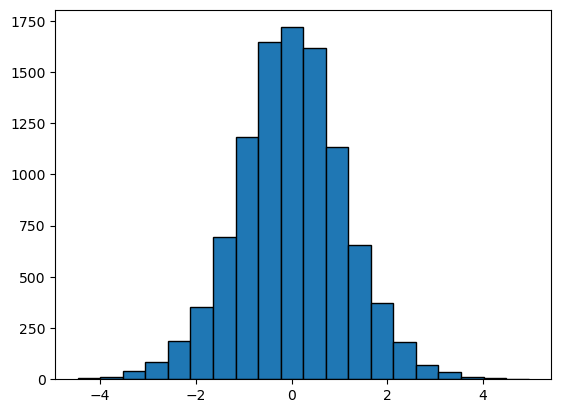

In [18]:
plt.hist(stat_sample, bins=20, edgecolor='black');

<h3>Two-sided test</h3>

$$
\begin{aligned}
\text{H}_0 &: \mu_1 = \mu_2 \\
\text{H}_1 &: \mu_1 \ne \mu_2
\end{aligned}
$$

In [24]:
ttest_ind(x1, x2, alternative='two-sided', equal_var=False)

TtestResult(statistic=np.float64(-1.8608134674868526), pvalue=np.float64(0.07939414018735823), df=np.float64(17.776473516178488))

In [28]:
print(f'P-value: {np.mean(np.abs(stat_sample) >= np.abs(t_statistic(x1, x2)))}')

P-value: 0.0817
